In [14]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the dataset
iris_data = pd.read_csv(r"D:\sonia\codsoft internship 2024\ML\datasets\IRIS.csv")

# Display the first few rows of the dataset
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Checking for missing values
iris_data.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# Encoding the target variable
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Splitting the dataset into features and target variable
features = iris_data.iloc[:, :-1]
target = iris_data['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)


Linear Regression Accuracy: 89.99%


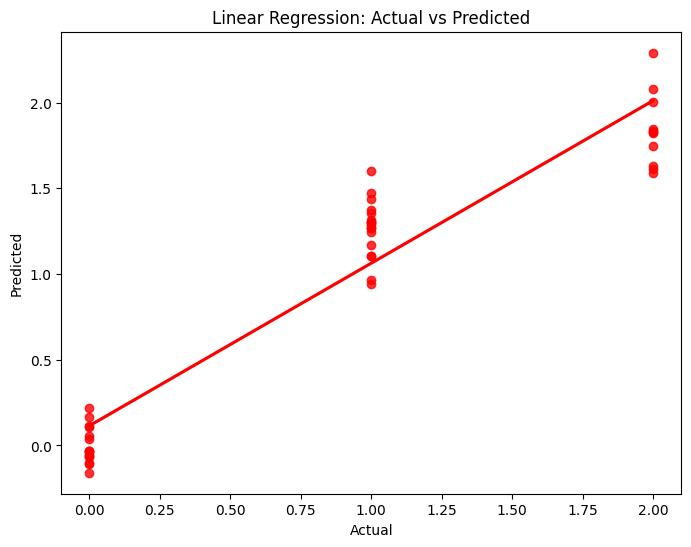

In [17]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Evaluating Linear Regression Model
linear_regression_accuracy = r2_score(y_test, y_pred_lr) * 100
print("Linear Regression Accuracy: %.2f%%" % linear_regression_accuracy)

# Plotting the results of Linear Regression
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred_lr, ci=None, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [18]:
# K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluating K-Nearest Neighbors Model
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
KNN Accuracy: 0.9777777777777777


In [19]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=0)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluating Decision Tree Model
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Decision Tree Accuracy: 0.9777777777777777


In [20]:
# Support Vector Machine Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluating Support Vector Machine Model
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
SVM Accuracy: 0.9777777777777777


In [21]:
# Random Forest Classifier Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating Random Forest Classifier Model
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Random Forest Accuracy: 0.9777777777777777


In [22]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluating Logistic Regression Model
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))


Logistic Regression Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Logistic Regression Accuracy: 0.9777777777777777


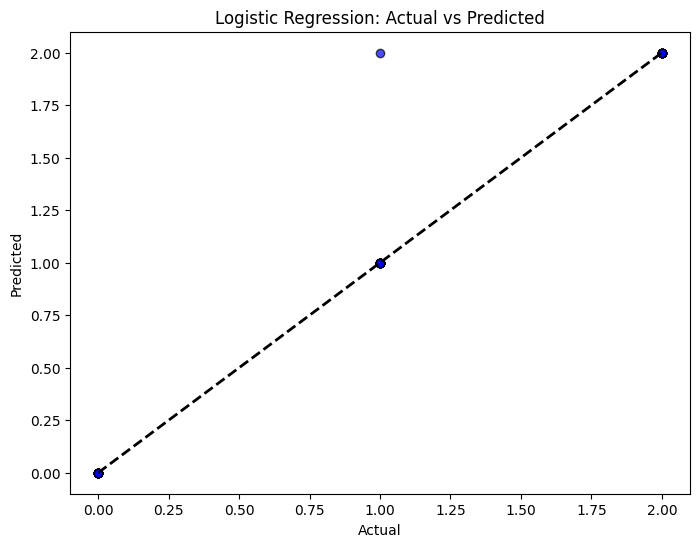

In [23]:
# Scatter Plot for Logistic Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_logistic, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Logistic Regression: Actual vs Predicted')
plt.show()


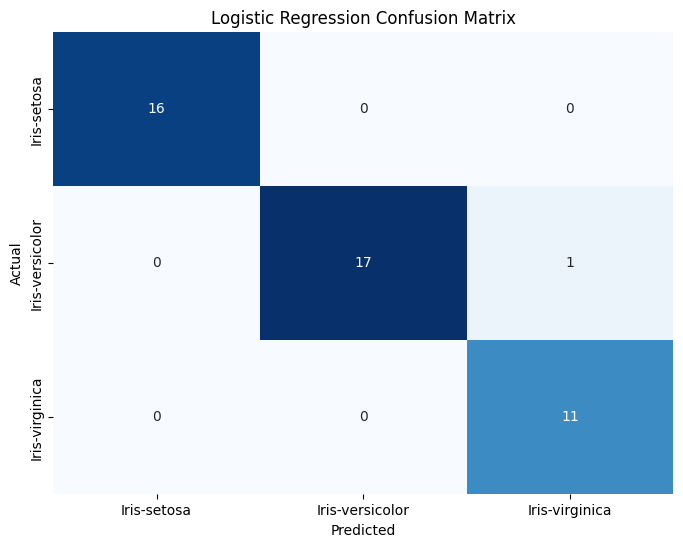

In [24]:
# Confusion Matrix Heatmap for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
